<a href="https://colab.research.google.com/github/MikolajWasowski/machine-learning-bootcamp/blob/main/unsupervised/02_dimensionality_reduction/02_pca_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=150)

In [2]:
X_train = X_train[:5000]
y_train = y_train[:5000]

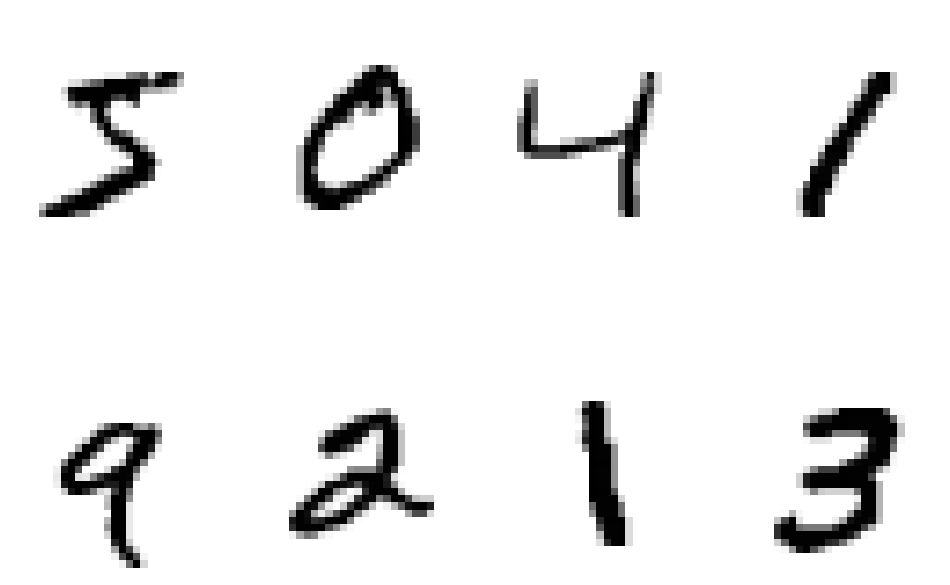

In [5]:

plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

In [6]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(5000, 28, 28)

In [7]:
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(5000, 784)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.4555,  1.4465, -0.1268],
       [ 4.0678,  1.5157,  2.1628],
       [-0.1116, -1.7779, -0.6183],
       [-3.4395,  2.3375,  0.6107],
       [-1.403 , -2.6951, -0.1721]])

In [10]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results


,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [11]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

In [12]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.455484,1.446469,-0.126839,5.0
1,4.067779,1.515698,2.162848,0.0
2,-0.111570,-1.777932,-0.618349,4.0
3,-3.439491,2.337523,0.610734,1.0
4,-1.403013,-2.695066,-0.172072,9.0


In [13]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class',
              symbol='class', opacity=0.7, size_max=10, width=950, height=700,
              template='plotly_dark', title='PCA - MNIST dataset')
